In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [478]:
df=pd.read_csv("new data.csv")# Reading the data  

# 1.Understanding the Data

In [479]:
df.head()
#reading heading of the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [480]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [481]:
df.dtypes.value_counts() # To check data type of data

object     7
float64    4
int64      1
dtype: int64

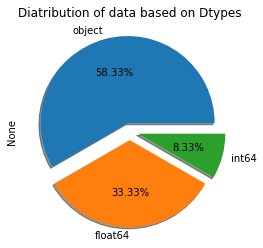

In [482]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True) 
plt.title('Diatribution of data based on Dtypes'); 

# Explode represents space between pieces
# autopct represents percentage value,%f represents number of deciml values 
# Shadow is for effect

In [483]:
df.shape # To get no.of rows and columns

(8523, 12)

In [484]:
df.isnull().sum() # to see the missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in 2 columns-Item_weight,Outlet_Size

In [485]:
df.describe() # Describe the statistical features of numerical column

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [486]:
df.columns # to get the name of all the columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## More Understanding of Data

In [487]:
df["Item_Type"].value_counts() # To get distribution of type of items

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [488]:
df["Outlet_Type"].value_counts() # To see distribition of types of different outlets

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

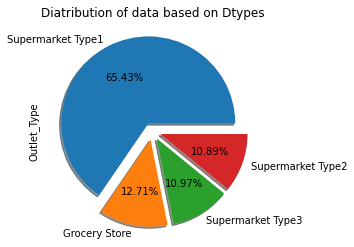

In [489]:
df["Outlet_Type"].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True) 
plt.title('Diatribution of data based on Dtypes'); 

# Explode represents space between pieces
# autopct represents percentage value,%f represents number of deciml values 
# Shadow is for effect

In [490]:
df["Item_Fat_Content"].value_counts() # To see distribution of fat content oin items

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

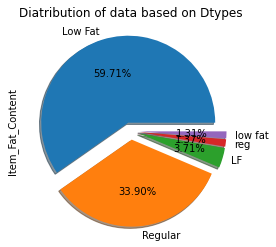

In [491]:
df["Item_Fat_Content"].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True) 
plt.title('Diatribution of data based on Dtypes'); 

# Explode represents space between pieces
# autopct represents percentage value,%f represents number of deciml values 
# Shadow is for effect

In [492]:
df[df["Item_Visibility"]==0] # to see why most of item has visibility 0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [493]:
df["Item_Outlet_Sales"].max()# to see maximum sale of outlet

13086.9648

In [494]:
df[df["Outlet_Type"]=="Supermarket Type1"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


###### We have seen from the above information that on basis of other columns we have to predict the Item-Outlet-Sales.


###### So our dependent variable is "Item-Outlet-sale" and all others are independent variables

# 2.EDA

##### Stands for exploratory data analysis ,helps in analysing dataset to summarize their main characterstics often with visual methods

## Univariate Analysis

### Univariate Analysis - Continous Values

Here the continous variables are - Item weight,Item visibility,Item price,Item outlet Sales

### Histogram

Historgram help us to see numeric distribution of the data 

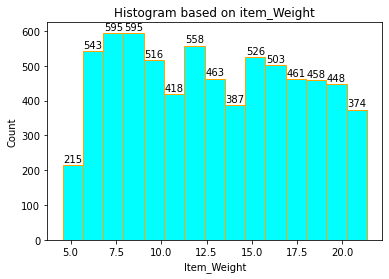

In [495]:
freq,bins,patches =plt.hist(df["Item_Weight"],bins=15,edgecolor="orange",color="cyan")
plt.xlabel("Item_Weight")
plt.ylabel("Count")
plt.title("Histogram based on item_Weight")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate(zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement for x and y cordinates        
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





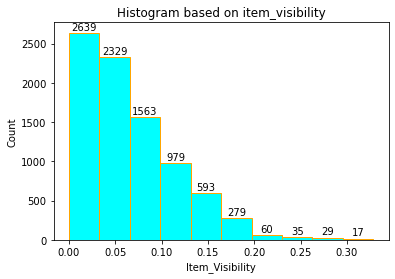

In [307]:
freq, bins, patches=plt.hist(df["Item_Visibility"],bins=10,edgecolor="orange",color="cyan")
plt.xlabel("Item_Visibility")
plt.ylabel("Count")
plt.title("Histogram based on item_visibility")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate( zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement          
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





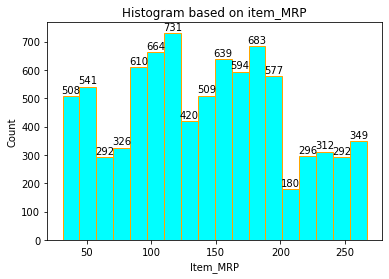

In [308]:

freq, bins, patches=plt.hist(df["Item_MRP"],bins=18,edgecolor="orange",color="cyan")
plt.xlabel("Item_MRP")
plt.ylabel("Count")
plt.title("Histogram based on item_MRP")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate( zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement          
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





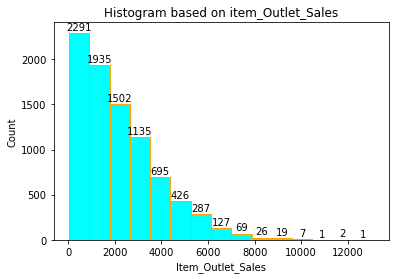

In [309]:

freq, bins, patches=plt.hist(df["Item_Outlet_Sales"],bins=15,edgecolor="orange",color="cyan")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Count")
plt.title("Histogram based on item_Outlet_Sales")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate( zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement          
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )




### Boxplot

Help us see the distribution of data based on percentiles and alo help us in seeing the outliers in the data

<AxesSubplot:title={'center':'Boxplot based on Item_Weight'}, xlabel='Item_Weight'>

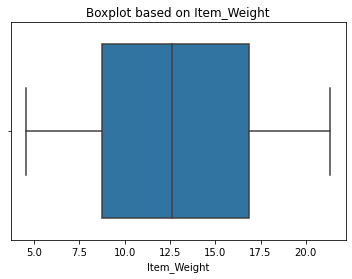

In [310]:
plt.title("Boxplot based on Item_Weight")
sns.boxplot(x="Item_Weight",data=df)

<AxesSubplot:title={'center':'Boxplot based on Item_Visibility'}, xlabel='Item_Visibility'>

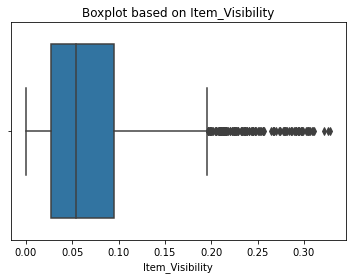

In [311]:
plt.title("Boxplot based on Item_Visibility")
sns.boxplot(x="Item_Visibility",data=df)

<AxesSubplot:title={'center':'Boxplot based on Item_MRP'}, xlabel='Item_MRP'>

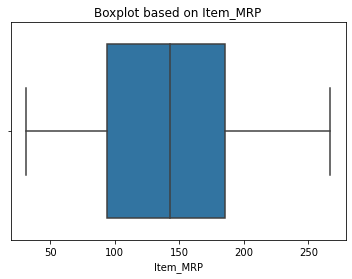

In [312]:
plt.title("Boxplot based on Item_MRP")
sns.boxplot(x="Item_MRP",data=df)

<AxesSubplot:title={'center':'Boxplot based on Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales'>

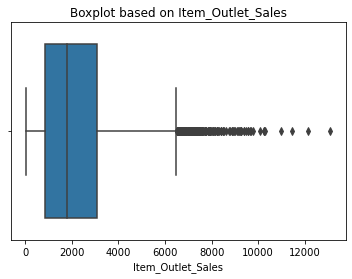

In [313]:
plt.title("Boxplot based on Item_Outlet_Sales")
sns.boxplot(x="Item_Outlet_Sales",data=df)

### Univariate Analysis - Categorical Values

Here the categorical variables are -Item_type,Item_fat_content,Outlet_Size,Outlet_Type,Outlet_location_type

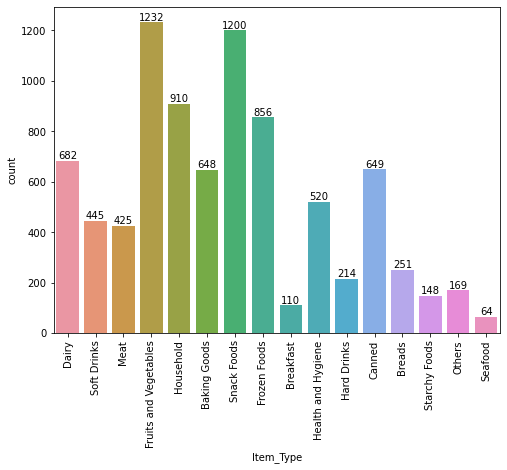

In [314]:
plt.figure(figsize=(8, 6))
cplot=sns.countplot(x="Item_Type",data=df)
for p in cplot.patches: # to iterate over each bar (in count plot we call bar=patches)
    cplot.annotate(format(p.get_height()), # annotation on basis of height
                   (p.get_x() + p.get_width() / 2, p.get_height()), # x-coordinate: p.get_x() + p.get_width() / 2,# y-coordinate: p.get_height()
                   ha = 'center', va = 'center', # horizontal and vertical allignment of text
                   xytext = (0, 5),  #  cordinates for positioning of text: (0, 5)
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()





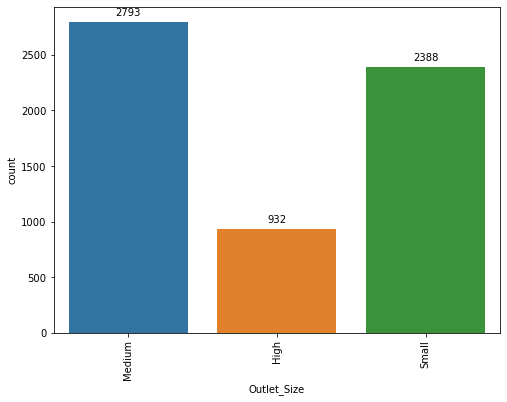

In [315]:
plt.figure(figsize=(8, 6))
splot=sns.countplot(x="Outlet_Size",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()



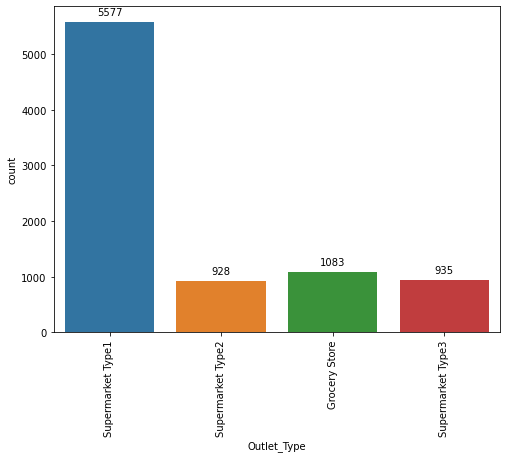

In [316]:
plt.figure(figsize=(8, 6))
splot=sns.countplot(x="Outlet_Type",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()



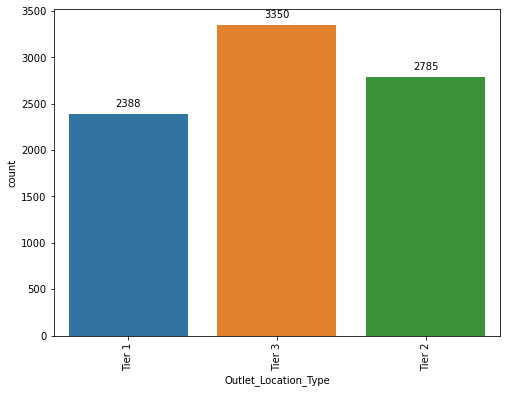

In [317]:
plt.figure(figsize=(8, 6))
splot=sns.countplot(x="Outlet_Location_Type",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()



## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

Text(0.5, 1.0, 'Fat_content on basis of Item weight')

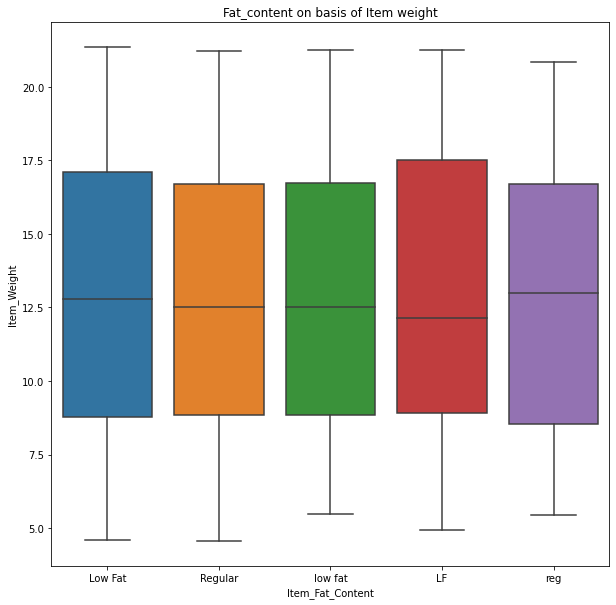

In [318]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
plt.title("Fat_content on basis of Item weight")


Text(0.5, 1.0, 'Fat_content on basis of Item weight')

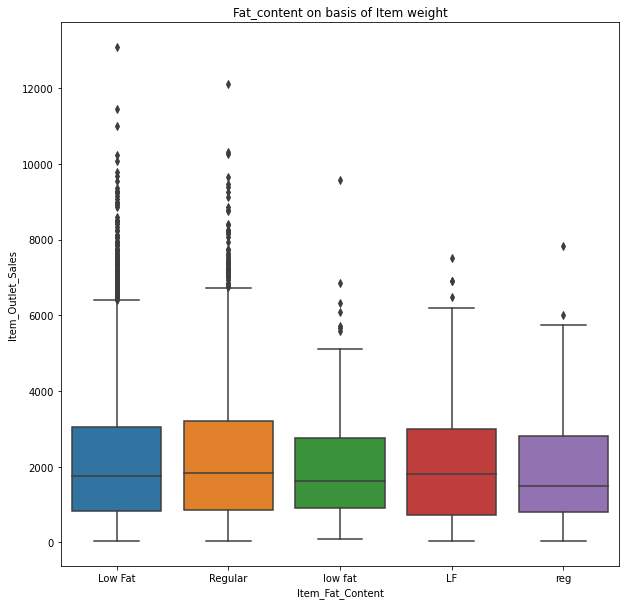

In [319]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title("Fat_content on basis of Item weight")


###### Fat content has no affect on weight


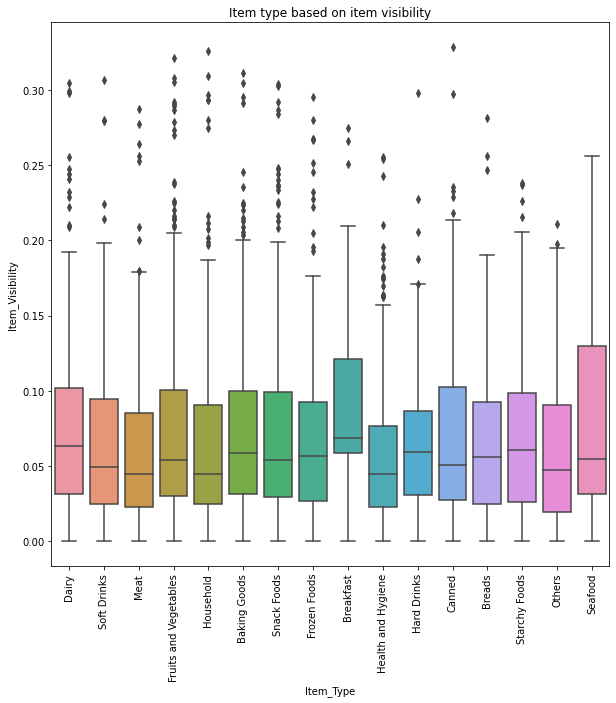

In [320]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Type', y='Item_Visibility', data=df)
plt.title("Item type based on item visibility")
plt.xticks(rotation=90)
plt.show()


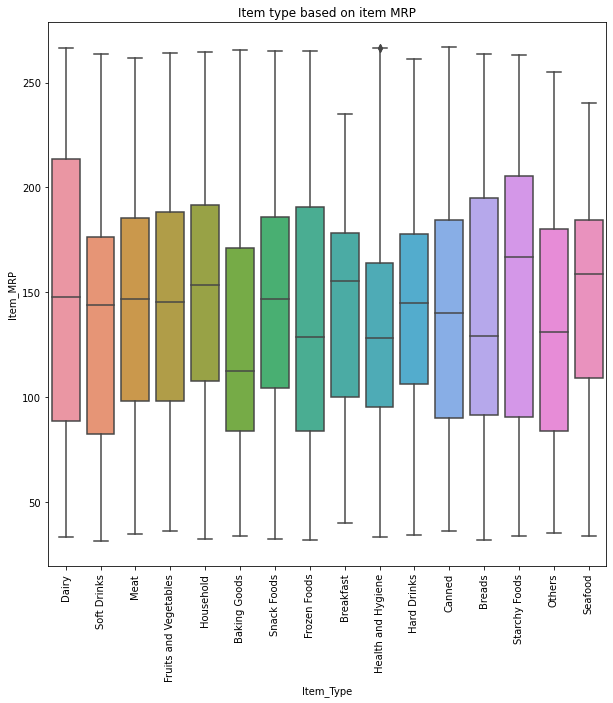

In [321]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.title("Item type based on item MRP")
plt.xticks(rotation=90)
plt.show()


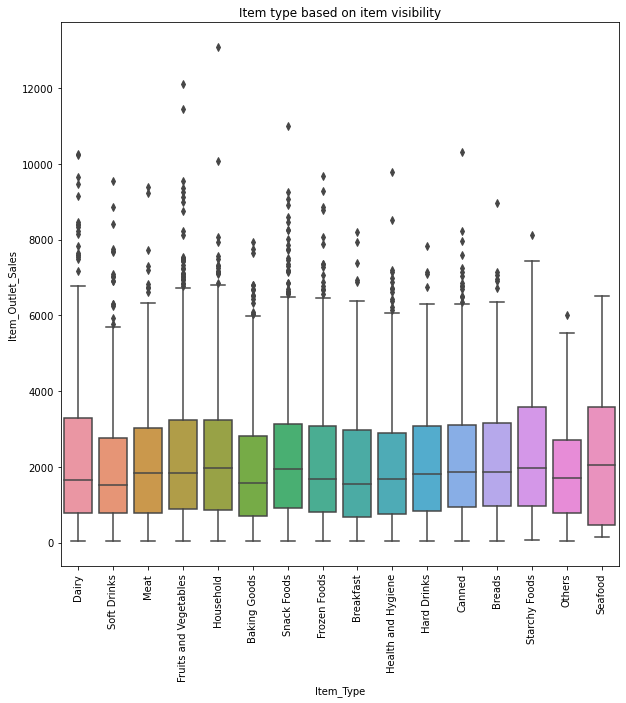

In [322]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title("Item type based on item visibility")
plt.xticks(rotation=90)
plt.show()


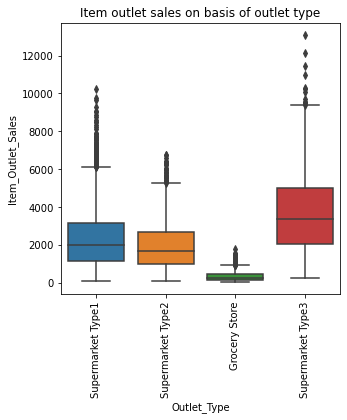

In [323]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Item outlet sales on basis of outlet type")
plt.xticks(rotation=90)
plt.show()


###### Maximum sale is from Supermarket type 3,maybe people prefer more supermarket type 3

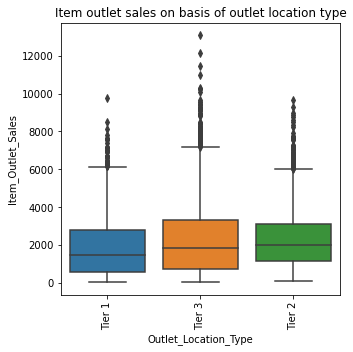

In [324]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title("Item outlet sales on basis of outlet location type")
plt.xticks(rotation=90)
plt.show()


###### Tier 3 type location has maximum sales maybe due to price is low here comparitively

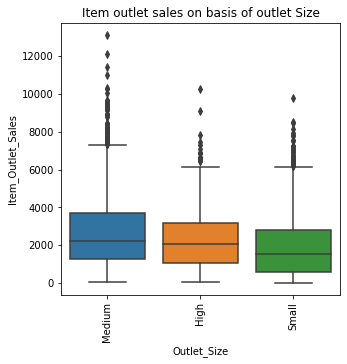

In [325]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title("Item outlet sales on basis of outlet Size")
plt.xticks(rotation=90)
plt.show()


###### Medium size outlet has maximum sales 

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

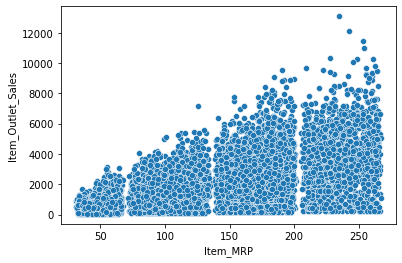

In [326]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=df) # for 2 continous variable

###### As the prices increase outlet sale increases

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

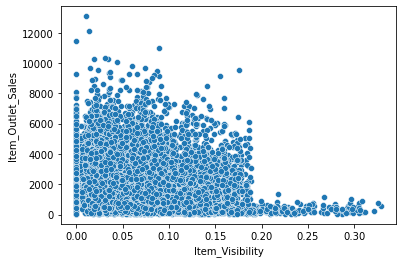

In [327]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Visibility'>

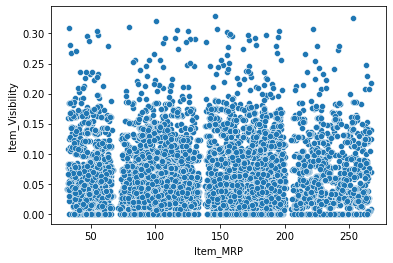

In [328]:
sns.scatterplot(x="Item_MRP",y="Item_Visibility",data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

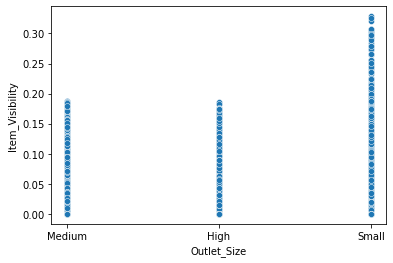

In [329]:
sns.scatterplot(x="Outlet_Size",y="Item_Visibility",data=df)

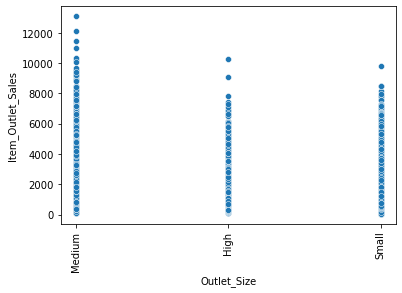

In [330]:
sns.scatterplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Outlet_Location_Type'>

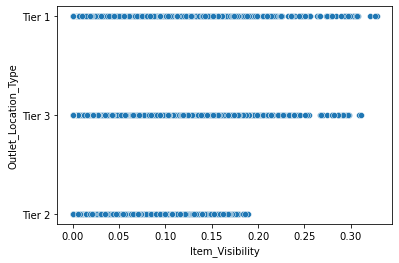

In [331]:
sns.scatterplot(x="Item_Visibility",y="Outlet_Location_Type",data=df)

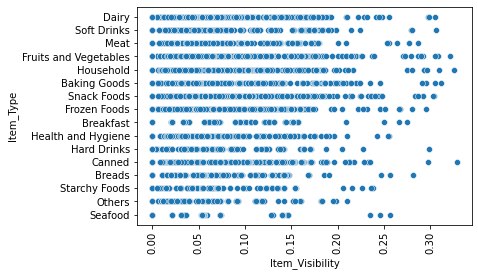

In [332]:
sns.scatterplot(x="Item_Visibility",y="Item_Type",data=df)
plt.xticks(rotation=90)
plt.show()

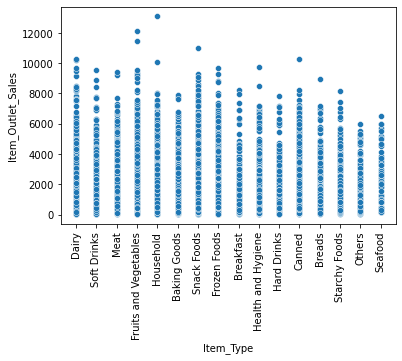

In [333]:
sns.scatterplot(x="Item_Type",y="Item_Outlet_Sales",data=df)
plt.xticks(rotation=90)
plt.show()

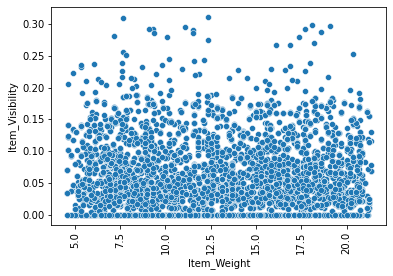

In [334]:
sns.scatterplot(x="Item_Weight",y="Item_Visibility",data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

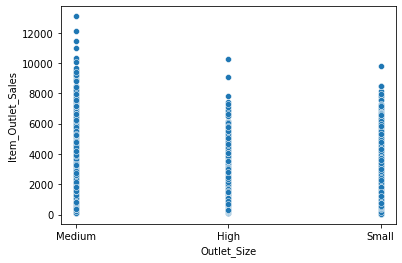

In [335]:
sns.scatterplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)

###### Item visibility does not affect the sales much

## Multivariate Analysis

Multivariate analysis is used for analysis of data involving more than one type of variable

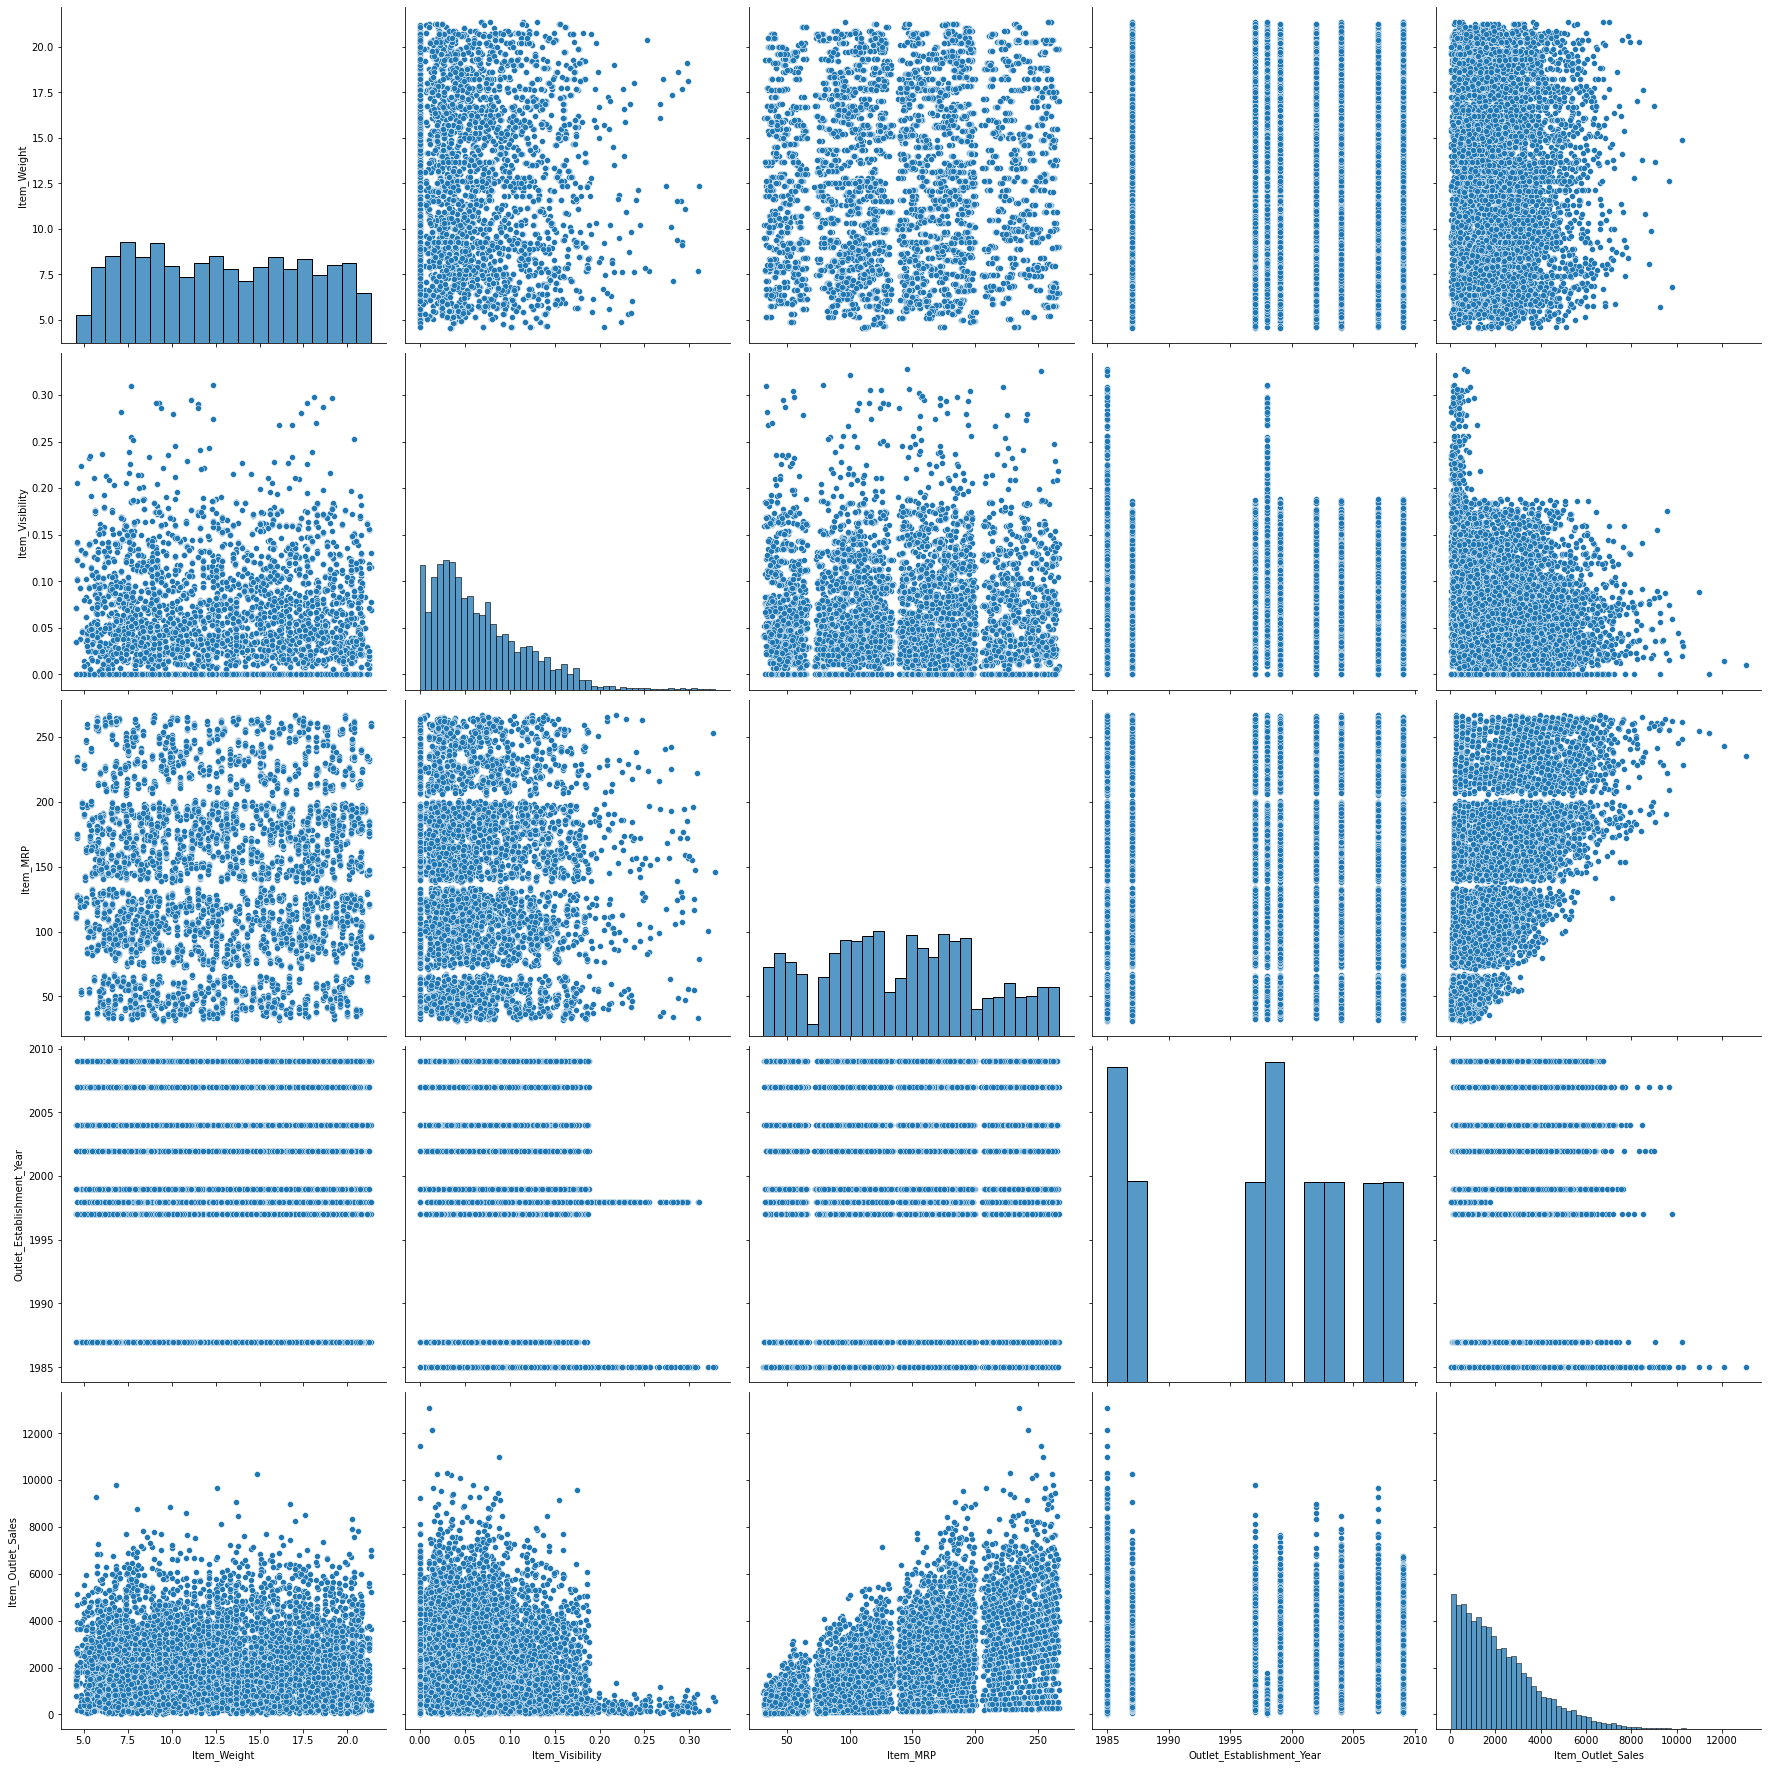

In [336]:
sns.pairplot(df,height=5)

###### This Is a Pairplot between all the variables.showing relationship between every variable,This plot is used to see the trend our our data

<AxesSubplot:>

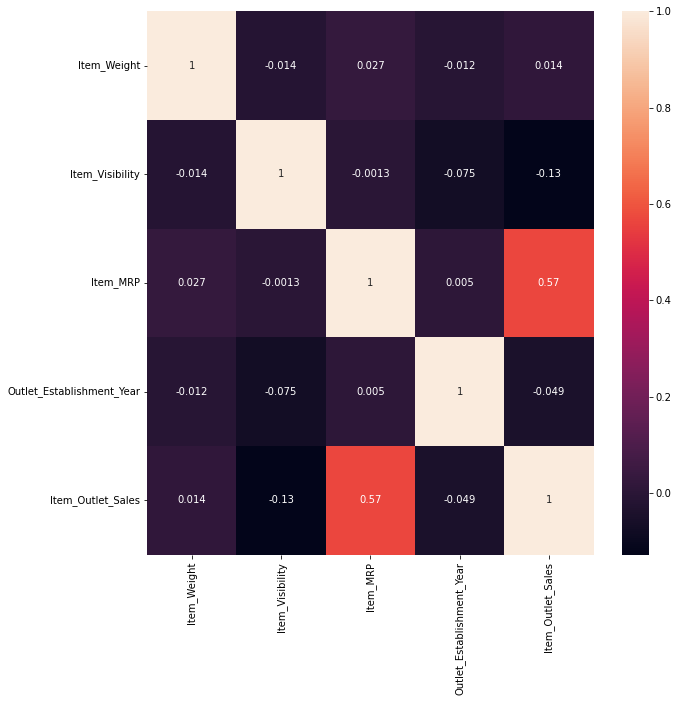

In [337]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

A heatmap is a graphical representation of data that uses a  color-coding to represent different values


Correlation measure the linear relationship between two variables

A positive correlation is a relationship between two variables in which both variables move in the same direction.



Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. 

A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1.0 indicates a perfect positive correlation.



### Insights after EDA


1.The oulet sales is directly dependent on Item_ MRP,Outlet has maximum sales  from medium type of outlet and it can be noted that Item_Visibility is inversely proportional to outlet sales.

2.A fact can also be noted that Item visibility is independent of Item MRP

3.Less weighted item item has more visibility ,as weight incraeses visibilty becomes less



 # 3.Identification of Outliers & Null values 

#### What is an Outlier?

An outlier is a data point in data set that is distant from all other observations. A data point that lies outside the overall distribution of dataset.

#### What is Reason for an Outlier to Exist in Dataset?

1.Variability in the data

2.An experimental Measurement error

#### Impacts of having an Outlier in Dataset?

1.It causes various problems during our statistical analysis

2.it may cause a significant impact on the mean and the standard deviation

#### Various ways of finding an Outlier

1.Using Z Score

2.Using IQR range

3.Using Box plot

4.Using Scatterplot

### Detecting Outlier Using Z score

Formula for Z score=(observation-mean)/Standard Deviation


Z score tells us how much std is away from mean 

68%(data)-1

95%(data)-2

99.7%(data)-3



C:\Users\madhur.gauri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

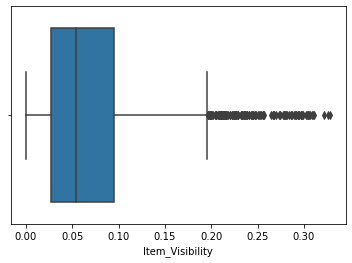

In [338]:
sns.boxplot(df["Item_Visibility"])

In [339]:
data=df["Item_Visibility"]

In [340]:
data.mean()

0.06613202877895127

In [341]:
data.std()

0.051597822321135196

 z = (x-μ)/σ

In [342]:
outliers=[]
def detect_outliers(data):# create function named detect_outliers
    
    threshold=4 # minimum value above which there exists a outlier
    mean=np.mean(data) # To calculate the mean of data
    std=np.std(data) # To calculate the Std of data
    
    
    for i in data:
        z_score= (i-mean)/std # Formula for z_score 
        if np.abs(z_score) > threshold: # if z_score > threshold we consider it as outlier
            outliers.append(i)
         
           
    return outliers

In [343]:
outlier_pt=detect_outliers(data) # Making object 

In [344]:
outlier_pt

[0.293417759,
 0.278974075,
 0.291865402,
 0.297883712,
 0.328390948,
 0.32111501,
 0.274405193,
 0.30374337,
 0.294939214,
 0.284065879,
 0.309390255,
 0.277459381,
 0.304859104,
 0.291826616,
 0.298205272,
 0.325780807,
 0.27321283,
 0.308145448,
 0.293066133,
 0.290430317,
 0.280164929,
 0.304737387,
 0.294948897,
 0.28701714,
 0.302478871,
 0.286344848,
 0.289522833,
 0.296713665,
 0.305305397,
 0.291438755,
 0.279783532,
 0.286357776,
 0.311090379,
 0.281509514,
 0.278730642,
 0.306542848,
 0.274592283,
 0.299097859,
 0.279886948,
 0.297312685]

### InterQauntile Range

To find IQR of Random data ,arrange it in ascending order ,find median of data, now leaving the median ,keep values left and right to median in bracket,now from left bracket find median and same for right ,median from left bracket become Q1 and median from right bracket become Q3

In [345]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [346]:
q1, q3=np.percentile(data,[25,75]) # take 25 anf 75 percentile of q1 and q3 resp.

In [347]:
print(q1,q3) # printing the values

0.0269894775 0.0945852925


In [348]:
iqr_value=q3-q1 # IQR_VALUE=Q3-Q1
print(iqr_value)

0.067595815


In [349]:
lbv=q1 -(1.5 * iqr_value) # 7.91-(1.5*23.0896) for lower bound
ubv=q3 +(1.5 * iqr_value) # 7.91+(1.5*23.0896) for upper bound

In [350]:
print(lbv,ubv) # Printing lower bpound value and upper bound value

-0.07440424500000001 0.195979015


###### These 2 are the upper bound and lower bound of our data ,anything lies above or below these 2 points are treated as outliers 

### Boxplot

A boxplot is used to display 5 main features of data and on basis of that we can also detect the outliers in the data


1.q1=25% 

2.q3=75% 

3.q2= 50% /median

4.maximum/q4= 100%

5.minimum/tail/0%

C:\Users\madhur.gauri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

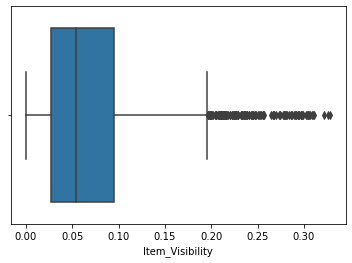

In [351]:
sns.boxplot(df["Item_Visibility"]) # to see outliers in the data

### Scatterplot

A scatter plot is a two-dimensional plot that uses dots to represent the values and it tells how one variable is affecting the other variable and is also used to see the outliers which are different from other data points

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

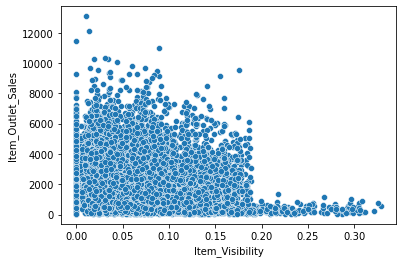

In [352]:
sns.scatterplot(data=df, x="Item_Visibility",y="Item_Outlet_Sales")


### Conclusion

Since there are various differnt method to detect an outlier and some work best some kind of data and other work best for other type of data,Since Z_score method gave us the result for the outliers present in our data.

Where as IQR method help us to get a range , the points lie below or above that range are termed as outliers.


Boxplot Helps us to visualise that range and show the points outside that range as an outlier.

Scatterplot shows us the trend of the data and the points which donot follow the trend are termed as outliers.

##  Detection of Null Values

In [353]:
df.isnull().sum() # we will replace missing value with median or mode and drop the column having too many null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

From this we infer there are some null values in Item_Weight and Outlet_Size. So, we will either replace it or drop it later. 

##### As we have seen there are null values present in our data ,now we will see it Visually using Heatmap

<AxesSubplot:>

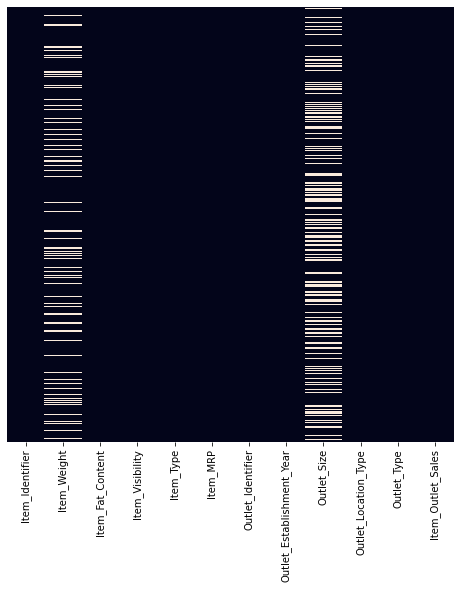

In [354]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

# 4. Descriptive Stats - 5 KPIs

KPI stands for key performance indicator, a quantifiable measure of performance over time for a specific objective.

It helps us to draw conclusion about data from business perspective and help us in better understanding of data

What Are the 5 Key Performance Indicators?


###### 1.As the MRP increases its Outlet Sales also increases,it could be because  higher priced items  has higher demand

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

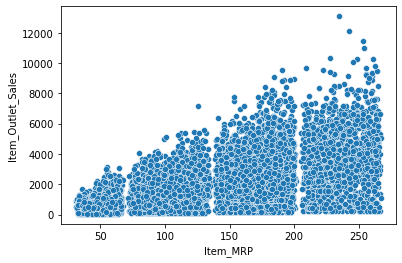

In [355]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=df) # try making bucket of items

In [356]:
Item_Type=df[(df["Item_MRP"]>=5) & (df["Item_MRP"]<=50)] # to see what all items lie between this range of price

In [357]:
Item_Type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
27,DRJ59,11.650,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
...,...,...,...,...,...,...,...,...,...,...,...,...
8442,FDX40,NaN,Low Fat,0.173324,Frozen Foods,39.9164,OUT019,1985,Small,Tier 1,Grocery Store,38.6164
8445,NCL05,19.600,Low Fat,0.048093,Health and Hygiene,44.4770,OUT018,2009,Medium,Tier 3,Supermarket Type2,432.7700
8446,FDT04,17.250,Low Fat,0.107259,Frozen Foods,40.1822,OUT045,2002,NaN,Tier 2,Supermarket Type1,510.6686
8463,FDG59,NaN,Low Fat,0.043025,Starchy Foods,37.6164,OUT027,1985,Medium,Tier 3,Supermarket Type3,810.9444


In [358]:
Item_Type=(df[(df["Item_MRP"]>=50) & (df["Item_MRP"]<=100)])   # to see what all items lie between this range of price
Item_Type 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
15,FDP49,9.000,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
...,...,...,...,...,...,...,...,...,...,...,...,...
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [359]:
Item_Type=df[(df["Item_MRP"]>=100) & (df["Item_MRP"]<=150)]   # to see what all items lie between this range of price
Item_Type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
13,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
...,...,...,...,...,...,...,...,...,...,...,...,...
8503,FDQ44,20.50,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8507,FDN28,5.88,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850


In [360]:
Item_Type=df[(df["Item_MRP"]>=150) & (df["Item_MRP"]<=200)]    # to see what all items lie between this range of price
Item_Type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
14,FDF32,16.35,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
24,FDR28,13.85,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250
...,...,...,...,...,...,...,...,...,...,...,...,...
8497,FDT08,13.65,Low Fat,0.049209,Fruits and Vegetables,150.0050,OUT035,2004,Small,Tier 2,Supermarket Type1,2247.0750
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8512,FDR26,20.70,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.70,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880


In [361]:
Item_Type=df[(df["Item_MRP"]>=200)]   # to see what all items lie between this range of price
Item_Type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
40,FDU02,13.350,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Small,Tier 1,Supermarket Type1,3435.5280
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560


### Since different price buckets contain different items ,so we cant say this price bucket contain these type of item

###### 2.The smaller stores have less sale and higher item visibility ,maybe due to they want to increase sales of smaller store.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

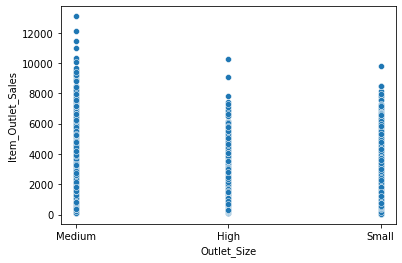

In [362]:
sns.scatterplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

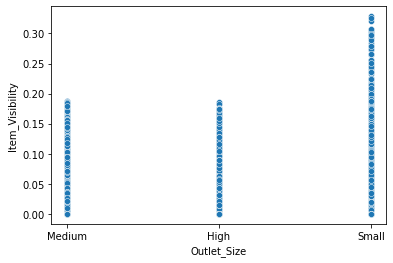

In [363]:
sns.scatterplot(x="Outlet_Size",y="Item_Visibility",data=df)

##### 3.SuperMarket type3 has the maximum sales ,it could be because of it contains more daily use items

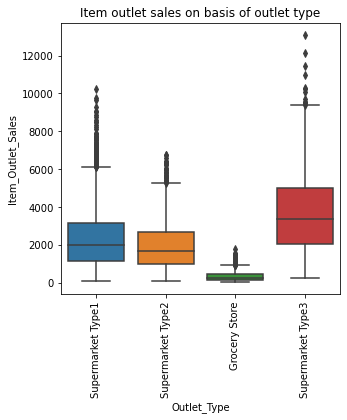

In [364]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Item outlet sales on basis of outlet type")
plt.xticks(rotation=90)
plt.show() # try bucket item


##### 4.It can be seen almost all items have approximately same range.it coud be because all items are priced in equal manner

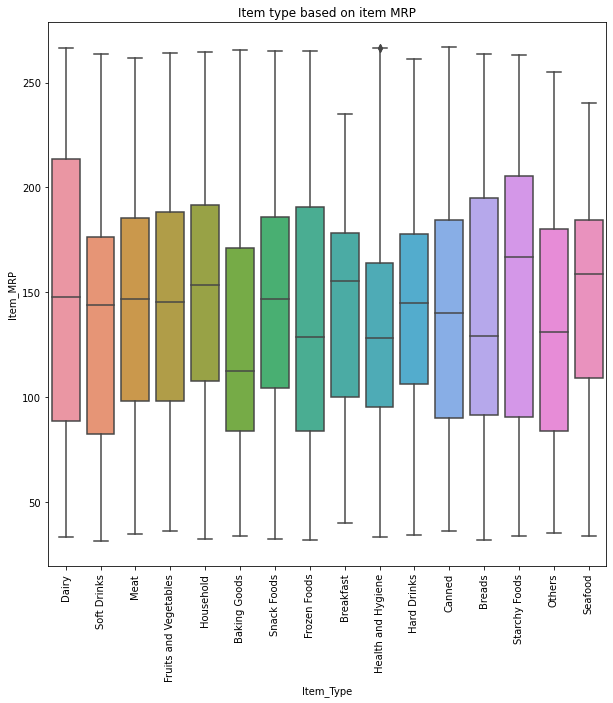

In [365]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.title("Item type based on item MRP")
plt.xticks(rotation=90)
plt.show()


#### 5.Almost all location types has same amount of sales,it could be there are equal no.of stores in every location

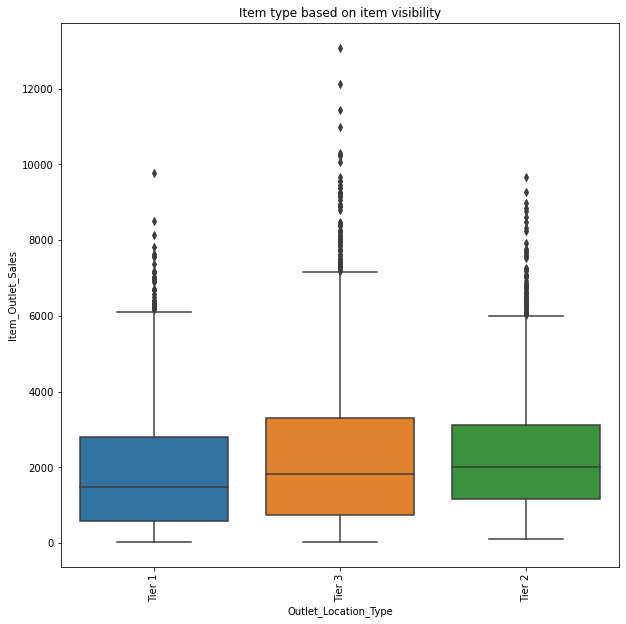

In [366]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title("Item type based on item visibility")
plt.xticks(rotation=90)
plt.show()


# 5. Techniques to handle Null values & outliers

### Handle Ouliers

#### There is some points in Item_Visibility and Item_Outlet_Sales ,which are distant from observation ,but cant be considered as outliers beacause sales can be too high and visibility also ,so we  cant consider anypoint as outliers in data

Methods to Remove outliers:

1.Deleting observations-In this method first we findIQR Range ,then we drop or delete the data which lies outside of IQR range

2.Mean-Median imputation-In this method on basis of IQR range we impute either mean or median in the data having outliers

### Handle Null Values

We have null values in Item_Visibility and Item_Outlet_Sales

### Replace with Median

In [367]:
g=df["Item_Weight"].median()


In [368]:
type(g)

float

Text(0.5, 1.0, 'Before replacing with median')

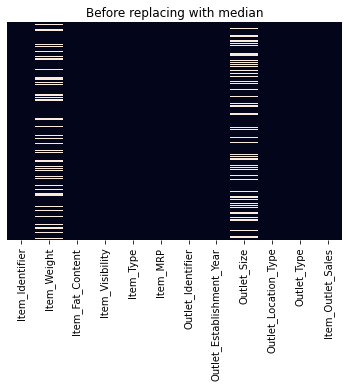

In [369]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("Before replacing with median")

Text(0.5, 1.0, 'After Replacing with Median')

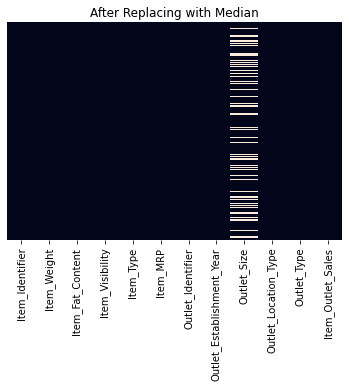

In [370]:


df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("After Replacing with Median")



In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Since outlet size is an important variable in determing the dependent variable so will cannot drop or remove its value ,we will replace it by mean or median 



### Replace with Mode

In [372]:
df["Outlet_Size"].mode()[0]

'Medium'

In [373]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [374]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

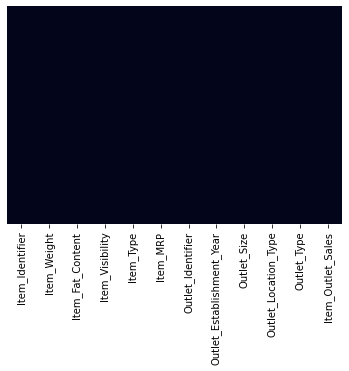

In [375]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### Now all the null values has been removed ,and all the columns and rows are still present

In [376]:
df.shape

(8523, 12)

# 5.Data transformation techniques

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model.

Scaling can make a difference between a weak machine learning model and a better one

### Normalisation

Min Max Scaler — normalization

 It normalizes the data into a range between 0 and 1 based on the formula:


x’ = (x — min(x)) / (max(x) — min(x))

In [377]:

from sklearn.preprocessing import MinMaxScaler # Importing MinMaxScaler library

In [378]:
Scaling=MinMaxScaler() # passing to object

In [379]:
b=Scaling.fit_transform(df[["Item_Visibility","Item_MRP"]])

In [380]:
b

array([[0.04886645, 0.92750715],
       [0.05870508, 0.0720684 ],
       [0.05103696, 0.46828841],
       ...,
       [0.10714751, 0.22849221],
       [0.44221878, 0.30493925],
       [0.13666114, 0.18750976]])

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.


Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

<Figure size 1440x360 with 0 Axes>

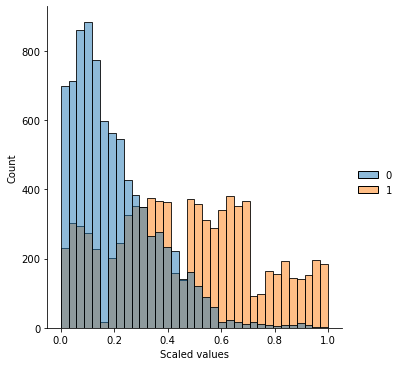

In [381]:
plt.figure(figsize=(20,5)) 
sns.displot(b);
plt.xlabel("Scaled values"); # 0 representing Item_Visibility and 1 representing Item_MRP

                                

##### Since this type of technique used in Image processing where we need values between 0 and 1 

### Standarisation

Text(0.5, 1.0, 'Displot before scaling')

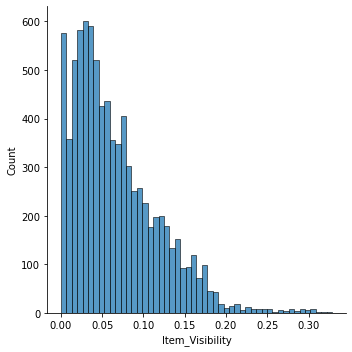

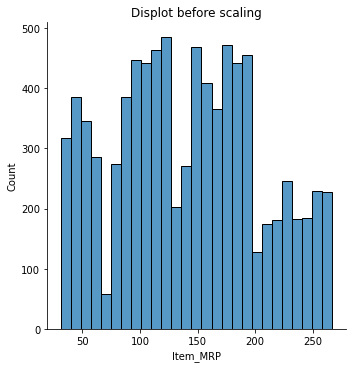

In [382]:
sns.displot(x="Item_Visibility",data=df)
sns.displot(x="Item_MRP",data=df)
plt.title("Displot before scaling")


Standard Scaler — standardization

StandardScaler() converts the numbers into the standard form of mean = 0 and std = 1 based on z-score formula:


x’ = (x — mean) / standard deviation.

In [383]:
from sklearn.preprocessing import StandardScaler # Import Standard Scaler Library

In [384]:
Scaling=StandardScaler() # Passing the object

In [385]:
a=Scaling.fit_transform(df[["Item_Visibility","Item_MRP"]]) 

In [386]:
a

array([[-0.97073217,  1.74745381],
       [-0.90811123, -1.48902325],
       [-0.95691733,  0.01004021],
       ...,
       [-0.59978449, -0.89720755],
       [ 1.53287976, -0.60797692],
       [-0.41193591, -1.05226104]])

In [387]:
len(a)

8523

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation

Standardization can be helpful in cases where the data follows a Gaussian distribution. 

However, this does not have to be necessarily true. 

<Figure size 1440x360 with 0 Axes>

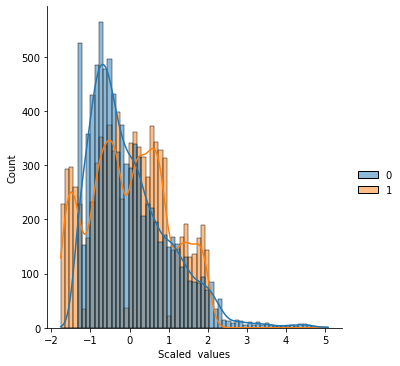

In [388]:
plt.figure(figsize=(20,5)) 
sns.displot(a,kde=True)
plt.xlabel("Scaled  values"); # # 0 representing Item_Visibility and 1 representing Item_MRP



##### Standardisation results in normal distribution of our data ,with mean =0,and std=1 

#### Which one to choose for current Data

For current data we have applied Standarisation and Normalisation on both Continous Variables and seen the results

In normalisation we have data between 0 and 1 and for standarisation we have mean as 0 of data and std=1 

Normalisation is used when data does not follow Gaussian dsitribution(normal distribution) and in image processing

Standarisation is used when data follows Gaussian distribution (normal distribution)






In standarisation ,we convert data into standard  normal form and is used where gradient descent algorith is used andalso affect of outliers does not affect this ,so we will use Standardisation in our current data





# 6.Feature Encoding Techniques


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [390]:
df.shape

(8523, 12)

### 1.Label Encoding

This type of encoding is used when categorical feature is ordinal,means order is important

In this each label is converted into integer value

In [391]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [392]:
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])

 

In [393]:
df.shape

(8523, 12)

In [394]:
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])

In [395]:
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [396]:
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])

In [397]:
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])

In [398]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [399]:
df.shape

(8523, 12)

In [400]:
df["Item_Weight"].dtype

dtype('float64')

In [401]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


#### We have converted categorical columns into numerical and removed all unnecessary column 
These are the columns which are useful and left after removing null values

In [402]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [403]:
df.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],inplace=True,axis=1)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int32  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int32  
 6   Outlet_Location_Type  8523 non-null   int32  
 7   Outlet_Type           8523 non-null   int32  
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int32(5)
memory usage: 432.9 KB


### Which one to use for our current Data

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/




# 7.Need of correlation

Correlation is defined as the linear relationship between two variables ,how one variable depends on another variable


correlation is of three types:
    
1.Positive correlation-in this type of correlation in which two variables move in same direction,if x increases ,y also increases

2.Negative correlation-in this type of correlation in which two variable moves in opposite direction,if x increases why decreases

3.zero correlation - when there is no relationship between the 2 variables

A perfect negative correlation is represented by the value -1.0,

 0 indicates no correlation,

+1.0 indicates a perfect positive correlation.



### How to Find Correlation

In [405]:
df.corr()# this is the theoritical way to find correlation between variables

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017255,-0.014168,0.028038,0.024951,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.017255,1.000000,0.034042,-0.115958,-0.000876,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.014168,0.034042,1.000000,-0.035249,-0.001315,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.115958,-0.035249,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024951,-0.000876,-0.001315,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574
Outlet_Size,-0.010536,-0.012058,0.069309,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.001958,-0.004102,-0.028099,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,-0.004214,-0.173468,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.009693,0.009800,-0.128625,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

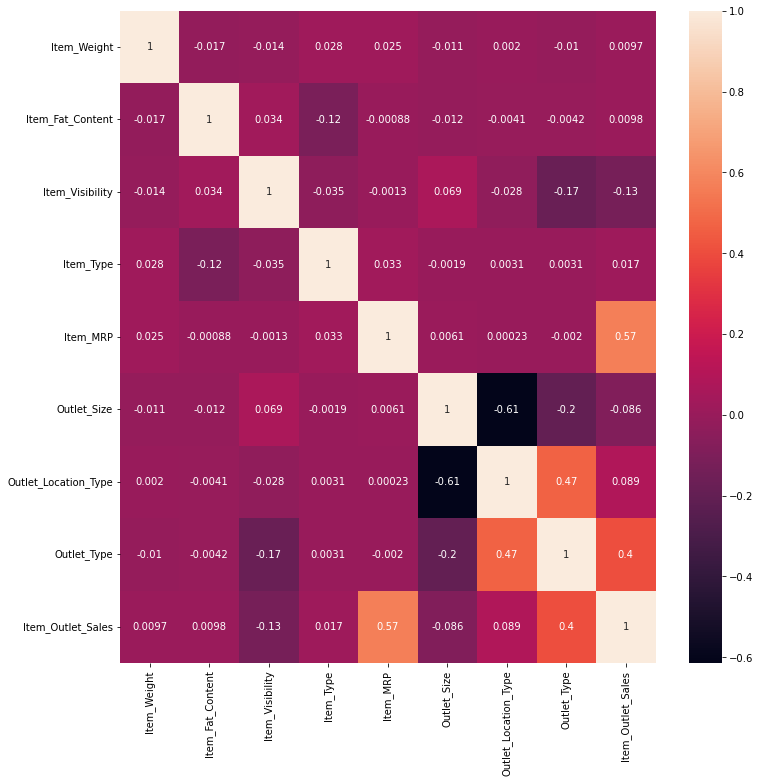

In [406]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

## Different Cross Validation Techniques

Cross validation techniques are used to maintain the accuracy of the data,Becasue when we do train test split ,data randomly splits into training and test phase.




#### Different Types of Cross Validation:

## HoldOut Validation Approach: Train and Test Split

In this we just do train test split,taking example of Decision tree Regressor,we train our model with training dataset and we validate our model with test dataset.


    

In [407]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [408]:
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y=df["Item_Outlet_Sales"]

In [409]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)
model=LinearRegression()
model.fit(X_train,y_train)
result=model.score(X_test,y_test)
print(result*100)



51.7610491109332


 ## K Fold Cross Validation

In kFold cross validation we do multiple splits ,we divide whole data into k subset of equal size,for first we take first as test and rest as train ,in second we take 2nd as test and rest train

In [410]:
from sklearn.model_selection import KFold
model=LinearRegression()
KFold_validation=KFold(10)

In [411]:
from sklearn.model_selection import cross_val_score

In [412]:
results2=cross_val_score(model,X,y,cv=KFold_validation).max()


In [413]:
print(results2*100)

53.68975001368689




## Applying Different Algoriths

Since our Dependent variable is of Regression type ,we will apply Regression algortiths here.

# Linear Regression

Linear Regression is used when the dependent variable(target) is continous in nature.

In [414]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [415]:
X=df[[ 'Item_Weight', 'Item_Fat_Content', "Item_Visibility", "Item_Type",
       "Item_MRP", 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y=df["Item_Outlet_Sales"]

##### Split the data into Training set and testing set using Train_Test_Split

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101) 

### Importing and Fitting the Model

In [418]:
from sklearn.linear_model import LinearRegression # Importing linear regression model

In [419]:
lm=LinearRegression() # lm depicts the logmodel we are using 

In [420]:
lm.fit(X_train,y_train)

LinearRegression()

### Cofficients

In [421]:
# The coefficients
print('Coefficients: \n', lm.coef_) #  the size of the coefficient for each independent variable tell the dependency of that variable on dependent variable and sign gives the direction of effect.

Coefficients: 
 [ 8.55679977e-01  3.03764204e+01 -1.65538261e+03 -2.38434975e+00
  1.56764038e+01 -3.22552369e+02 -4.20209041e+02  1.00003127e+03]


### Predictions and Evaluations

In [422]:
predictions=lm.predict(X_test)

In [423]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [424]:
df5 # Predicted are the values predicted by our model

,Actual,Predicted
8179,904.8222,2041.718498
8355,2795.6942,2142.363180
3411,1947.4650,1214.982045
7089,872.8638,538.486660
6954,2450.1440,2341.664474
...,...,...
2135,366.1900,974.840129
3122,3361.6242,2957.733268
5822,1860.2452,1321.246971
6402,2766.3990,2758.566815


Text(0, 0.5, 'pedictions')

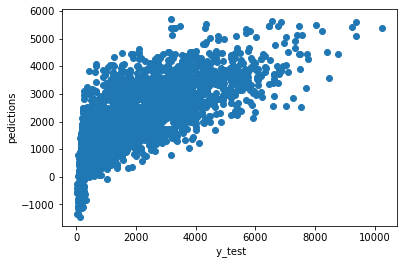

In [425]:
plt.scatter(y_test,predictions)# Here we draw scatter plot to see relation between actual and predicted values
plt.xlabel(' y_test')
plt.ylabel('pedictions')

In [426]:
from sklearn import metrics # These are different evaluation metrices

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 861.7787280496137
MSE: 1295994.3164124584
RMSE: 1138.417461396503


In [427]:
coeffecients = pd.DataFrame(lm.coef_,X.columns) # variables with their cofficient
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Item_Weight,0.855680
Item_Fat_Content,30.376420
Item_Visibility,-1655.382609
Item_Type,-2.384350
Item_MRP,15.676404
Outlet_Size,-322.552369
Outlet_Location_Type,-420.209041
Outlet_Type,1000.031273


### Final Score

In [428]:
lm.score(X_test,y_test)*100

51.7610491109332

## R Square

It is measure of goodness of the model

In [429]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,predictions)

In [430]:
r2

0.517610491109332

it means 51% of the variation in the dependent variable is explained by  linear relationship with independent variables in X and leftover is from other factors 


if RSquare =0,it means there is no linear relationship dependent and independent variable 

if RSquare=1, means perfect linear relationship between dependent and independent variable 


The closer the value of RSquare to 1 the better is fit

The closer the value of RSquare to 0 the poor is fit

# Decison Tree & Random Forest

### Train Test Split

Split your data into a training set and a testing set.

In [431]:
from sklearn.model_selection import train_test_split


In [432]:
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y=df["Item_Outlet_Sales"]

### Train a Model

In [433]:
from sklearn.tree import DecisionTreeRegressor

In [434]:
dtree = DecisionTreeRegressor(random_state = 0,criterion='mse',
    splitter='random',
    max_depth=20,
    min_samples_split=4) 

In [435]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=4, random_state=0,
                      splitter='random')

### Prediction and Evaluation

In [436]:
predictions = dtree.predict(X_test)

In [437]:
print(predictions)

[1455.1059     3082.21013333 1402.1748     ...  949.87466667 2881.13853333
 1840.937     ]


In [438]:
df6 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [439]:
df6

,Actual,Predicted
8179,904.8222,1455.105900
8355,2795.6942,3082.210133
3411,1947.4650,1402.174800
7089,872.8638,723.502667
6954,2450.1440,2198.915467
...,...,...
2135,366.1900,203.069000
3122,3361.6242,4633.968000
5822,1860.2452,949.874667
6402,2766.3990,2881.138533


In [440]:
from sklearn import metrics # These are different evaluation metrices

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 990.9914693502906
MSE: 1997983.5614798851
RMSE: 1413.5004639121578


In [441]:
dtree.score(X_test,y_test)*100

25.63190310418213

##  Training the Random Forest model

In [442]:
from sklearn.ensemble import RandomForestRegressor

In [443]:
rfc = RandomForestRegressor(n_estimators=500,min_samples_leaf=2, min_samples_split=5,max_depth=10)

In [444]:
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=500)

### Predictions and Evaluation

In [445]:
predictions = rfc.predict(X_test)

In [446]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [447]:
df7

,Actual,Predicted
8179,904.8222,1581.213566
8355,2795.6942,2657.905007
3411,1947.4650,1338.494163
7089,872.8638,611.881946
6954,2450.1440,2391.206642
...,...,...
2135,366.1900,421.761069
3122,3361.6242,3086.873478
5822,1860.2452,1331.904473
6402,2766.3990,3249.264040


In [448]:
from sklearn import metrics # These are different evaluation metrices

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 738.6539910902511
MSE: 1101735.9285220169
RMSE: 1049.6360933780893


In [449]:
rfc.score(X_test,y_test)*100

58.99165245121358

# Xgboost

In [450]:
from xgboost import XGBRegressor

### Fitting the Model

In [451]:
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y=df["Item_Outlet_Sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101) 

In [452]:
xmodel=XGBRegressor()

In [453]:
xmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Prediction and Evaluations

In [454]:
predictions=xmodel.predict(X_test)

In [455]:
print(predictions)

[1027.0442 3388.5762 1181.1461 ... 1337.412  3240.961  2748.8108]


In [456]:
df8= pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [457]:
df8

,Actual,Predicted
8179,904.8222,1027.044189
8355,2795.6942,3388.576172
3411,1947.4650,1181.146118
7089,872.8638,497.672333
6954,2450.1440,2237.262207
...,...,...
2135,366.1900,653.269409
3122,3361.6242,3536.259521
5822,1860.2452,1337.411987
6402,2766.3990,3240.960938


In [458]:
from sklearn import metrics # These are different evaluation metrices

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 794.2463027758849
MSE: 1256958.6532429922
RMSE: 1121.141674028306


In [459]:
xmodel.score(X_test,y_test)*100

53.21401801265387

# SVM 

In [460]:
from sklearn.svm import SVR


In [461]:
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y=df["Item_Outlet_Sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101) 

In [462]:
svc_model = SVR()

In [463]:
svc_model.fit(X_train,y_train)

SVR()

In [464]:
predictions=svc_model.predict(X_test)

In [465]:
print(predictions)

[1576.36454021 1979.710017   1418.12475792 ... 1475.8401535  2245.09174713
 2434.28008498]


In [466]:
df9 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [467]:
df9

,Actual,Predicted
8179,904.8222,1576.364540
8355,2795.6942,1979.710017
3411,1947.4650,1418.124758
7089,872.8638,1256.138912
6954,2450.1440,2014.100976
...,...,...
2135,366.1900,1239.988212
3122,3361.6242,2321.234521
5822,1860.2452,1475.840153
6402,2766.3990,2245.091747


In [468]:
from sklearn import metrics # These are different evaluation metrices

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1104.0006478822045
MSE: 2166991.8607028136
RMSE: 1472.0706031650839


In [469]:
svc_model.score(X_test,y_test)*100

19.34114785717772

# Conclusion - ONE HOT ENCODING



1.Linear Regression= 56.79

2.Decision Tree=32.26

3.Random Forest=58.59

4.xgboost=53.51

5.SVM=15.96


**Best Score is given By random Forest**


# Conclusion- LABEL ENCODING

1.Linear Regression= 51.76

2.Decision Tree=25.63

3.Random Forest=58.99

4.xgboost=53.21

5.SVM=19.34


**Best Score is given By random Forest**


# Hyperparameter Tuning - Random Forest

### GridSearchCv

It loops through Predefined parameters and fit model on training test,helps to selct best parameters from listed hyper parameters

In [470]:
from sklearn.model_selection import GridSearchCV

param_grid= {"criterion":["squared_error","absolute_error", "poisson"],"max_depth":[10,20],"min_samples_split":[2,3,4],"n_estimators":[400,500]}
clf = GridSearchCV(rfc, param_grid, cv=5)
clf.fit(X_train,y_train)

C:\Users\madhur.gauri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\madhur.gauri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhur.gauri\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\madhur.gauri\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\madhur.gauri\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\madhur.gauri\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = sel

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=500),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 20], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [400, 500]})

In [471]:
predictions=clf.predict(X_test)

In [472]:
print(predictions)

[1432.45342952 1518.83540325 1432.45342952 ... 1432.45342952 2427.26702397
 3890.44848988]


In [473]:
results5=cross_val_score(rfc, X, y,cv=10).max()

In [474]:
print(results5*100)

62.002792759271365


In [475]:
clf.best_params_

{'criterion': 'poisson',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 400}

**The score changes from 58.99 to 62.20 after Hyperparameter Tuning**